<a href="https://colab.research.google.com/github/VenGr0/Quiz_bot/blob/main/CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Навигация по уроку**

1. [Задачи машинного зрения на OpenCV](https://colab.research.google.com/drive/1x1rxbNfV1ft1ztIPwxA3q34J4MULix5A)
2. [OpenCV. Распознавание лиц (практика)](https://colab.research.google.com/drive/1GwMZ8BAjtdKBDA5S0lAX1OPMFmIaYhqL)
3. Домашняя работа


Используя знания из практической части урока и функцию `blur_face` (размытие), проведите следующий эксперимент:
1. Найдите фото любого известного актера или актрисы.
2. Распознайте лицо на фотографии. Выделите лицо овалом. Какой метод для рисования овала использовать, вы должны найти самостоятельно.
3. Выделите на изображении глаза. Выделите их кружком. Если вы чувствуете в себе суперсилу и дополнительный бекграунд знаний, и хотите получить больше баллов за задание, то нарисуйте вместо кружков солнцезащитные очки (картинку очков можно найти в интернете, задача их правильно масштабировать и разместить).
4. Все лицо кроме глаз необходимо "заблюрить" (размыть) с помощью функции `blur_face` (функция объявлена ниже).




Оценка за задание:
* 1 балл - задача решена с помощью куратора, лицо распознано прямоугольником, глаза кругом.
* 2 балла - задача решена с незначительными подсказками куратора, лицо распознано прямоугольником или кругом, глаза кругом, лицо размыто.
* 3 балла - задача решена самостоятельно, лицо распознано овалом, глаза кругом, удалось заблюрить лицо, не затронув глаза.
* 4 балла - задача решена самостоятельно на 3 балла, удалось нарисовать очки с подсказкой куратора, недостаточна соблюдена симметрия расположения очков или недостаточно учтены их размеры.
* 5 баллов - задача полностью решена самостоятельно, все пункты выполнены.

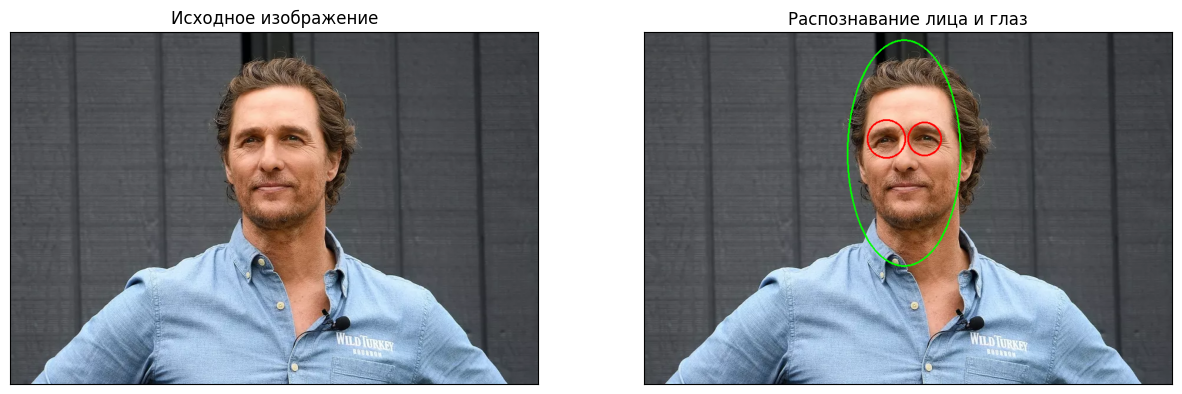

In [ ]:
import cv2
import matplotlib.pyplot as plt

def detect_face(img):
    # Загрузка каскада Хаара для поиска лиц
    classifier = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")
    # выполнение распознавания лиц
    bboxes = classifier.detectMultiScale(img, scaleFactor=2, minNeighbors=3, minSize=(50, 50))
    return bboxes

def detect_eyes(img, bboxes):
    # Загрузка каскада Хаара для поиска глаз
    classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_eye.xml")
    eyes = []
    for box in bboxes:
        x, y, width, height = box
        face = img[y:y + height, x:x + width]
        eyes_in_face = classifier_eye.detectMultiScale(face)
        for (x_eye,y_eye,w_eye,h_eye) in eyes_in_face:
            eyes.append((x + x_eye, y + y_eye, w_eye, h_eye))
    return eyes

def draw_ovals(img, bboxes, eyes):
    for box in bboxes:
        x, y, width, height = box
        # рисуем овал вокруг лица
        cv2.ellipse(img, (int(x + width/2), int(y + height/2)), (int(width/2), int(height/1)), 0, 0, 360, (0, 255, 0), 2)
    for eye in eyes:
        x, y, width, height = eye
        # рисуем круг вокруг глаза
        cv2.circle(img, (int(x + width/2), int(y + height/2)), int(width/2), (0, 0, 255), 2)
    return img

# загружаем изображение
img = cv2.imread('./mm.jpg')
# копируем исходное изображение
img_copy = img.copy()
# выполнение распознавания лиц
bboxes = detect_face(img)
# выполнение распознавания глаз
eyes = detect_eyes(img, bboxes)
# рисование овалов вокруг лиц и глаз
result_img = draw_ovals(img_copy, bboxes, eyes)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознавание лица и глаз')

plt.show()


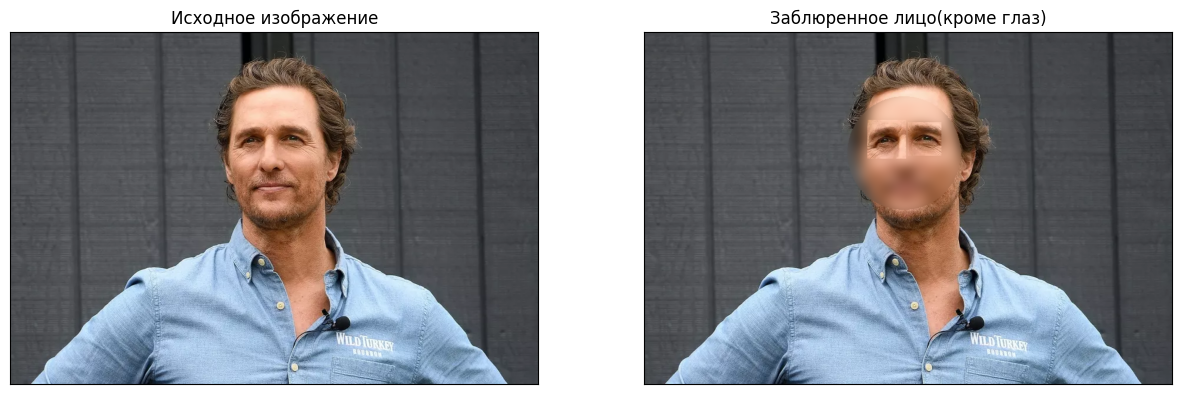

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_face(img):
    # Загрузка каскада Хаара для поиска лиц
    classifier = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")
    # выполнение распознавания лиц
    bboxes = classifier.detectMultiScale(img, scaleFactor=2, minNeighbors=3, minSize=(50, 50))
    return bboxes

def detect_eyes(img, bboxes):
    # Загрузка каскада Хаара для поиска глаз
    classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_eye.xml")
    eyes = []
    for box in bboxes:
        x, y, width, height = box
        face = img[y:y + height, x:x + width]
        eyes_in_face = classifier_eye.detectMultiScale(face)
        for (x_eye,y_eye,w_eye,h_eye) in eyes_in_face:
            eyes.append((x + x_eye, y + y_eye, w_eye, h_eye))
    return eyes

def draw_ovals(img, bboxes, eyes):
    # Создаем маску для лица
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    for box in bboxes:
        x, y, width, height = box
        # Рисуем овал вокруг лица
        cv2.ellipse(mask, (int(x + width/2), int(y + height/2)), (int(width/2), int(height/2)), 0, 0, 360, (255, 255, 255), -1)
    # Удаляем область вокруг глаз
    for eye in eyes:
        x, y, width, height = eye
        cv2.rectangle(mask, (x, y), (x + width, y + height), (0, 0, 0), -1)
    # Применяем размытие к лицу, кроме глаз
    blurred_img = cv2.GaussianBlur(img, (0, 0), 10)
    img[mask == 255] = blurred_img[mask == 255]
    return img

# загружаем изображение
img = cv2.imread('./mm.jpg')
# копируем исходное изображение
img_copy = img.copy()
# выполнение распознавания лиц
bboxes = detect_face(img)
# выполнение распознавания глаз
eyes = detect_eyes(img, bboxes)
# рисование овалов вокруг лиц и глаз
result_img = draw_ovals(img_copy, bboxes, eyes)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Заблюренное лицо(кроме глаз)')

plt.show()


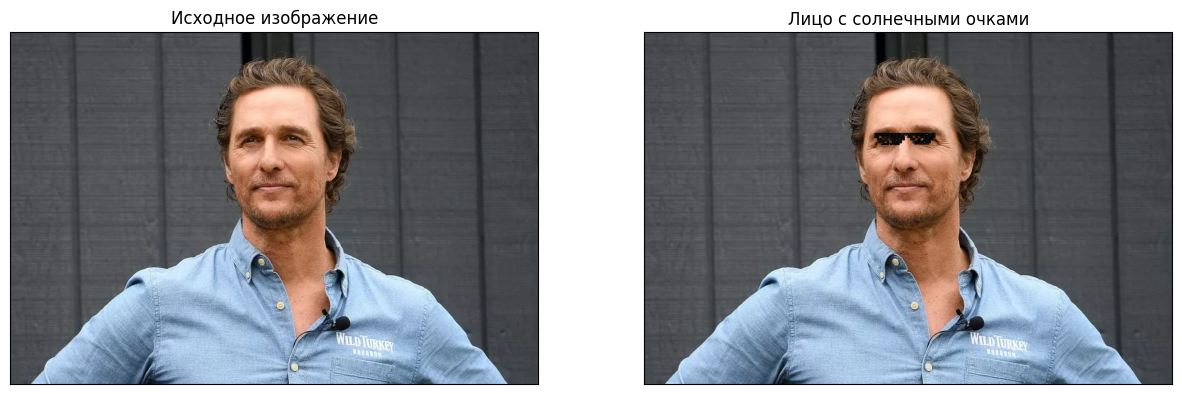

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_face(img):
    # Загрузка каскада Хаара для поиска лиц
    classifier = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")
    # выполнение распознавания лиц
    bboxes = classifier.detectMultiScale(img, scaleFactor=2, minNeighbors=3, minSize=(50, 50))
    return bboxes

def detect_eyes(img, bboxes):
    # Загрузка каскада Хаара для поиска глаз
    classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_eye.xml")
    eyes = []
    for box in bboxes:
        x, y, width, height = box
        face = img[y:y + height, x:x + width]
        eyes_in_face = classifier_eye.detectMultiScale(face)
        for (x_eye, y_eye, w_eye, h_eye) in eyes_in_face:
            eyes.append((x + x_eye, y + y_eye, w_eye, h_eye))
    return eyes

def add_glasses(img, eyes, glasses_img):
    if len(eyes) == 2:
        # Вычисление средней позиции двух глаз
        left_eye, right_eye = eyes
        x1, y1, w1, h1 = left_eye
        x2, y2, w2, h2 = right_eye
        avg_eye_x = (x1 + w1 // 2 + x2 + w2 // 2) // 2
        avg_eye_y = (y1 + h1 // 2 + y2 + h2 // 2) // 2

        # Положение очков на глазах
        glw = w1 * 2  # Ширина очков должна быть равна сумме ширин двух глаз
        glh = glw * glasses_img.shape[0] // glasses_img.shape[1]
        glx = avg_eye_x - glw // 2
        gly = avg_eye_y - glh // 2

        # Проверка на выход за пределы изображения
        if gly < 0 or glx < 0 or glx + glw > img.shape[1] or gly + glh > img.shape[0]:
            return img

        # Создание маски для очков
        glasses_mask_small = cv2.resize(glasses_img, (glw, glh))
        gray_mask = cv2.cvtColor(glasses_mask_small, cv2.COLOR_BGR2GRAY)
        ret, mask = cv2.threshold(gray_mask, 50, 255, cv2.THRESH_BINARY_INV)
        mask_inv = cv2.bitwise_not(mask)
        masked_glasses = cv2.bitwise_and(glasses_mask_small, glasses_mask_small, mask=mask)
        masked_face = cv2.bitwise_and(img[gly:gly+glh, glx:glx+glw], img[gly:gly+glh, glx:glx+glw], mask=mask_inv)
        img[gly:gly+glh, glx:glx+glw] = cv2.add(masked_glasses, masked_face)
    return img

# загружаем изображение
img = cv2.imread('./mm.jpg')
# копируем исходное изображение
img_copy = img.copy()
# выполнение распознавания лиц
bboxes = detect_face(img)
# выполнение распознавания глаз
eyes = detect_eyes(img, bboxes)
# добавление очков на лицо
glasses_img = cv2.imread('./sun0.png')  # Предполагается, что у вас есть изображение очков
result_img = add_glasses(img_copy, eyes, glasses_img)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Лицо с солнечными очками')

plt.show()